In [1]:
using Distributed
using SharedArrays
addprocs(11);

In [2]:
@everywhere include("inverse_prob.jl")
@everywhere using PyPlot
@everywhere using DSP
@everywhere using JLD2

In [3]:
@load "camembert_data/camembert_model.jld2"

15-element Array{Symbol,1}:
 :c                
 :c0               
 :rho              
 :Nx               
 :Ny               
 :Nt               
 :h                
 :t                
 :dt               
 :source           
 :source_position  
 :receiver_position
 :save_ratio       
 :pml_len          
 :pml_coef         

In [4]:
@load "camembert_data/camembert_data.jld2"

2-element Array{Symbol,1}:
 :data 
 :data0

# Functions

In [5]:
op_fn(x) = eval_fn_OT(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef, reg=reg, reg_m=reg_m, reg_p=reg_p, iterMax=iterMax)
op_grad(x) = eval_grad_OT(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef, reg=reg, reg_m=reg_m, reg_p=reg_p, iterMax=iterMax)

op_fn_l2(x) = eval_fn_l2(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef)
op_grad_l2(x) = eval_grad_l2(data0, x, rho, Nx, Ny, Nt, h, dt, source, source_position, receiver_position; save_ratio=save_ratio, pml_len=pml_len, pml_coef=pml_coef);

# L2 Gradient

In [6]:
x0 = c[:]
# x0 = xk[:]
println("Initial data complete.")

Initial data complete.


In [7]:
@time f0, grad0 = op_grad_l2(x0);
println(f0)

 67.093825 seconds (17.60 M allocations: 4.405 GiB, 1.61% gc time)
10.662896526526058


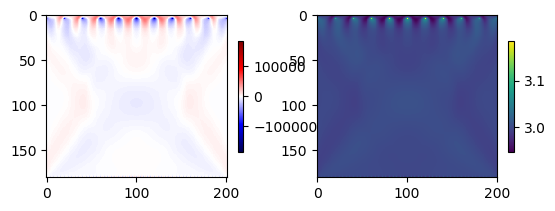

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac2716cbd0>

In [8]:
maxSearchTime = 5
rho = 0.3
iterTime = 10
alpha = 1e-6
mi = 1e-10
ma = 0
# mi = 3
# ma = 3.6
x1 = update_fn(x0, alpha, grad0, mi, ma)

mm = max(maximum(grad0), -minimum(grad0))
subplot(121)
imshow(reshape(grad0,Nx,Ny), cmap="seismic"); colorbar(shrink=0.3); clim(-mm,mm)
subplot(122)
imshow(reshape(x1,Nx,Ny)); colorbar(shrink=0.3)

In [48]:
# f1 = op_fn_l2(x1)
# println(f0)
# println(f1)
# println(f1-f0)

44.94378978199216
44.94314484973977
-0.0006449322523920387


In [15]:
# println("Start optimization.")
# xk, fn_value = LBFGS(op_fn_l2, op_grad_l2, x0, alpha, iterTime, mi, ma; m=5, alpha_search=1, rho=rho, c=1e-10, maxSearchTime=maxSearchTime, threshold=1e-10);

Start optimization.
Main iteration: 1
Start line search. fk: 4.12212e+01
    alpha: 1.00000e-06    fk1: 3.61067e+01    fk-c*alpha*gradk^2: 4.12135e+01
Line search succeed. Search time: 0.
----------------------------------------------------------------
Start LBFGS.
----------------------------------------------------------------
Main iteration: 2
Start line search. fk: 3.61067e+01
    alpha: 1.00000e+00    fk1: 3.77558e+01    fk-c*alpha*gradk^2: 3.61067e+01
    alpha: 3.00000e-01    fk1: 3.42713e+01    fk-c*alpha*gradk^2: 3.61067e+01
Line search succeed. Search time: 1.
----------------------------------------------------------------
Main iteration: 3
Start line search. fk: 3.42713e+01
    alpha: 1.00000e+00    fk1: 1.92980e+01    fk-c*alpha*gradk^2: 3.42713e+01
Line search succeed. Search time: 0.
----------------------------------------------------------------
Main iteration: 4
Start line search. fk: 1.92980e+01
    alpha: 1.00000e+00    fk1: 1.92346e+01    fk-c*alpha*gradk^2: 1.9298

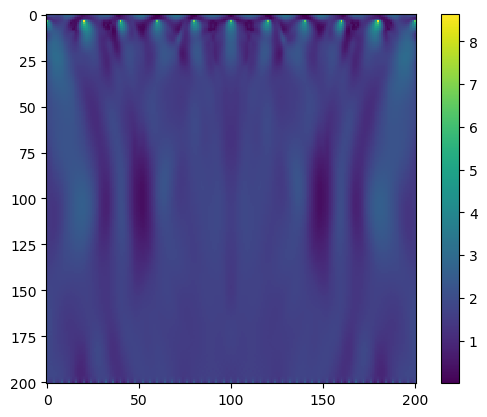

In [18]:
imshow(reshape(xk,Nx,Ny)); colorbar();

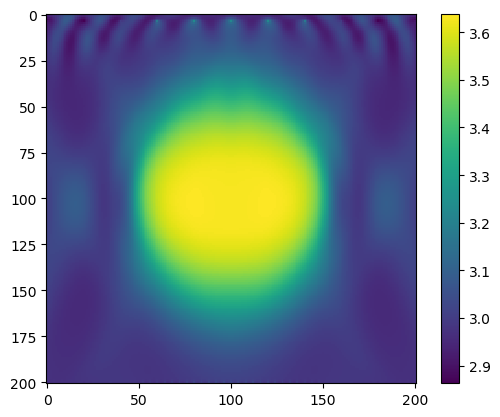

PyObject <matplotlib.colorbar.Colorbar object at 0x7f8b79744990>

In [17]:
imshow(reshape(xk,Nx,Ny)); colorbar()

## OT Gradient

In [9]:
M = cost_matrix_1d(t,t; p=2)
reg = 1e-5
reg_m = 1e0
reg_p = 0.1
iterMax = 1000;

In [10]:
x0 = c[:]
println("Initial data complete.")

Initial data complete.


In [11]:
@time f0, grad0 = op_grad(x0);
println(f0)

136.551795 seconds (6.73 M allocations: 3.306 GiB, 0.53% gc time)
34.35874183882151


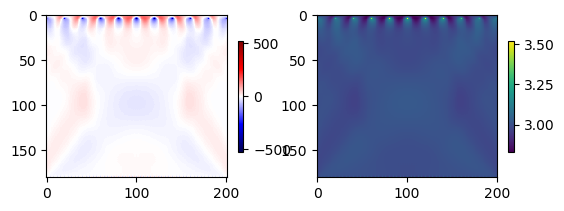

PyObject <matplotlib.colorbar.Colorbar object at 0x7fac2596afd0>

In [12]:
maxSearchTime = 5
rho = 0.3
iterTime = 10
alpha = 1e-3
mi = 1e-10
ma = 0
# mi = 3
# ma = 3.6
x1 = update_fn(x0, alpha, grad0, mi, ma)

mm = max(maximum(grad0), -minimum(grad0))
subplot(121)
imshow(reshape(grad0,Nx,Ny), cmap="seismic"); colorbar(shrink=0.3); clim(-mm,mm)
subplot(122)
imshow(reshape(x1,Nx,Ny)); colorbar(shrink=0.3)

In [85]:
# f1 = op_fn(x0-alpha*grad0)
# f1 - f0

-0.013556283055699225